In [3]:
# Set the device to run the models on as a GPU if one is available
import torch 
if torch.cuda.is_available():  
    dev = "cuda:0" 
    print("Using GPU")
else:  
    dev = "cpu"  
device = torch.device(dev)  

Using GPU


In [4]:
from utils.manage_data import create_dataset, split_data, split_extras, criteria_calculations, separate_test_data
from utils.process_predictions import roi_postprocess, lm_preds_postprocess

In [19]:
import pandas as pd
import os

def process_csv_files(predictions_file, targets_file):
    # Read the CSV files using pandas
    predictions_df = pd.read_csv(predictions_file)
    targets_df = pd.read_csv(targets_file)

    # Find common image names
    common_images = predictions_df['image'].tolist()

    # Ensure both dataframes have "image name" as the key column
    predictions_df.set_index('image', inplace=True)
    targets_df.set_index('image', inplace=True)

    missing = []
    extra = []

    for image_name in common_images:
         # Resulting arrays
        prediction_values = []
        target_values = []
        
        pred_row = predictions_df.loc[image_name]
        targ_row = targets_df.loc[image_name]

        # Process predictions:
        prediction_values.extend([int(i/3) for i in range(2, len(pred_row), 3) if pred_row[i] > 0.5])

        # Process targets:
        target_values.extend([int(i/2)-1 for i in range(2, len(targ_row), 2) if targ_row[i] > 0])

        prediction_set = set(prediction_values)
        target_set = set(target_values)
    
        # Find extra and missing predictions
        extra_preds = list(prediction_set - target_set)
        missing_preds = list(target_set - prediction_set)

        extra.extend(extra_preds)
        missing.extend(missing_preds)

    return extra, missing

In [20]:
predictions_file = os.path.join('stats','UNet_LM_CL.csv')
targets_file = os.path.join('stats','annotations.csv')

extra, missing = process_csv_files(predictions_file, targets_file)

C:\Users\cngar\AppData\Local\Temp\ipykernel_476\2703404688.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  prediction_values.extend([int(i/3) for i in range(2, len(pred_row), 3) if pred_row[i] > 0.5])
C:\Users\cngar\AppData\Local\Temp\ipykernel_476\2703404688.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  target_values.extend([int(i/2)-1 for i in range(2, len(targ_row), 2) if targ_row[i] > 0])


In [27]:
import matplotlib.pyplot as plt
from collections import Counter

def count_and_plot(array,title_name='count'):
    # Count occurrences of each value, ensuring counts for all values 1-14
    full_range = range(0, 13)
    counts = Counter(array)
    counts = {value: counts.get(value, 0) for value in full_range}

    # Create the bar chart
    labels, values = zip(*sorted(counts.items()))
    plt.bar(['T4','T5','T6','T7','T8','T9','T10','T11','T12','L1','L2','L3','L4'], values, color='blue', alpha=0.7)
    plt.xlabel('Vertebra')
    plt.ylabel('Counts')
    plt.title(title_name)
    plt.xticks(range(0, 13))  # Values 1-10
    plt.show()

# def count_and_plot(array):
#     # Count occurrences of each value
#     counts = Counter(array)

#     # Create the bar chart
#     labels, values = zip(*sorted(counts.items()))
#     plt.bar(['T4','T5','T6','T7','T8','T9','T10','T11','T12','L1','L2','L3','L4'], values, color='blue', alpha=0.7)
#     plt.xlabel('Values')
#     plt.ylabel('Counts')
#     plt.title('Value Counts')
#     plt.xticks(range(1, 14),['T4','T5','T6','T7','T8','T9','T10','T11','T12','L1','L2','L3','L4'])  # Assuming values 1-10
#     plt.show()

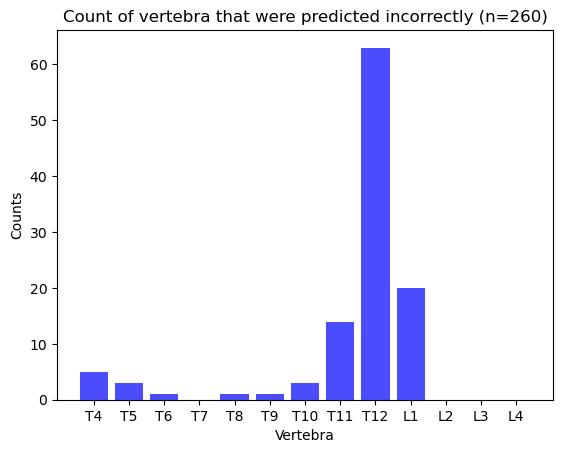

In [30]:
count_and_plot(extra,title_name='Count of vertebra that were predicted incorrectly (n=260)')

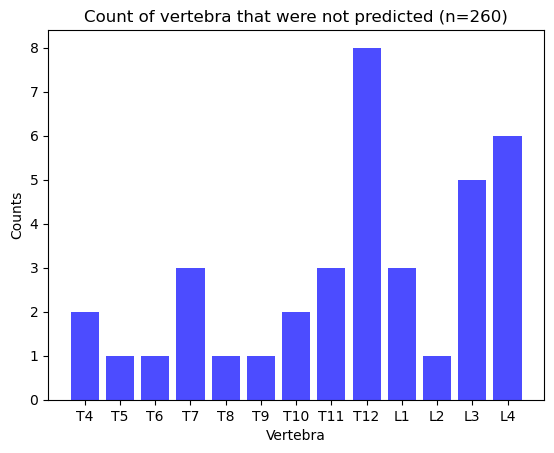

In [31]:
count_and_plot(missing,title_name='Count of vertebra that were not predicted (n=260)')

In [ ]:
P

## Step 1 Models:

### Training

In [5]:
%run cross_validation.py UNet_LM

Training to commence for fold 1:
Epoch: 1
Batch 052/52  loss: 0.210048  elapsed: 38s
Validation accuracy increased (1.000000 --> 19753.205125).  Saving model ...

	val Loss: 0.027705	val acc: 19753.205125
Epoch: 2
Batch 052/52  loss: 0.046446  elapsed: 36s
EarlyStopping counter: 1 out of 5

	val Loss: 0.010879	val acc: 21007.108723
Epoch: 3
Batch 052/52  loss: 0.018033  elapsed: 36s
Validation accuracy increased (19753.205125 --> 12533.031590).  Saving model ...

	val Loss: 0.006758	val acc: 12533.031590
Epoch: 4
Batch 052/52  loss: 0.012105  elapsed: 36s
Validation accuracy increased (12533.031590 --> 8710.991603).  Saving model ...

	val Loss: 0.005044	val acc: 8710.991603
Epoch: 5
Batch 052/52  loss: 0.009030  elapsed: 36s
Validation accuracy increased (8710.991603 --> 4858.245479).  Saving model ...

	val Loss: 0.004157	val acc: 4858.245479
Epoch: 6
Batch 052/52  loss: 0.007306  elapsed: 36s
Validation accuracy increased (4858.245479 --> 4214.776073).  Saving model ...

	val Loss: 

Batch 052/52  loss: 0.004659  elapsed: 37s
Validation accuracy increased (737.946179 --> 416.153997).  Saving model ...

	val Loss: 0.002243	val acc: 416.153997
Epoch: 9
Batch 052/52  loss: 0.003763  elapsed: 37s
Validation accuracy increased (416.153997 --> 414.312328).  Saving model ...

	val Loss: 0.001834	val acc: 414.312328
Epoch: 10
Batch 052/52  loss: 0.003167  elapsed: 38s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001578	val acc: 419.987554
Epoch: 11
Batch 052/52  loss: 0.002781  elapsed: 39s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001663	val acc: 533.177503
Epoch: 12
Batch 052/52  loss: 0.002449  elapsed: 38s
EarlyStopping counter: 3 out of 5

	val Loss: 0.001389	val acc: 426.362270
Epoch: 13
Batch 052/52  loss: 0.002119  elapsed: 37s
EarlyStopping counter: 4 out of 5

	val Loss: 0.001978	val acc: 422.949177
Epoch: 14
Batch 052/52  loss: 0.001985  elapsed: 37s
Validation accuracy increased (414.312328 --> 408.447249).  Saving model ...

	val Loss: 0.001104	val ac

Batch 052/52  loss: 0.002658  elapsed: 37s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001327	val acc: 553.980134
Epoch: 12
Batch 052/52  loss: 0.002252  elapsed: 37s
EarlyStopping counter: 3 out of 5

	val Loss: 0.001186	val acc: 551.746557
Epoch: 13
Batch 052/52  loss: 0.002200  elapsed: 42s
EarlyStopping counter: 4 out of 5

	val Loss: 0.001120	val acc: 603.811602
Epoch: 14
Batch 052/52  loss: 0.002055  elapsed: 42s
EarlyStopping counter: 5 out of 5

	val Loss: 0.001235	val acc: 581.305661
Early stopping
Training finished. Evaluation begins...
Test Accuracy: 252.68177292083388
Training to commence for fold 10:
Epoch: 1
Batch 052/52  loss: 0.192091  elapsed: 39s
Validation accuracy increased (1.000000 --> 24923.475520).  Saving model ...

	val Loss: 0.024134	val acc: 24923.475520
Epoch: 2
Batch 052/52  loss: 0.039133  elapsed: 39s
Validation accuracy increased (24923.475520 --> 13810.314766).  Saving model ...

	val Loss: 0.009291	val acc: 13810.314766
Epoch: 3
Batch 052/52  loss

In [6]:
%run cross_validation.py Attn_UNet_LM

Training to commence for fold 1:
Epoch: 1
Batch 052/52  loss: 0.215360  elapsed: 43s
Validation accuracy increased (1.000000 --> 32174.488277).  Saving model ...

	val Loss: 0.029545	val acc: 32174.488277
Epoch: 2
Batch 052/52  loss: 0.047666  elapsed: 43s
Validation accuracy increased (32174.488277 --> 30456.470693).  Saving model ...

	val Loss: 0.009745	val acc: 30456.470693
Epoch: 3
Batch 052/52  loss: 0.016235  elapsed: 42s
Validation accuracy increased (30456.470693 --> 14008.993448).  Saving model ...

	val Loss: 0.005876	val acc: 14008.993448
Epoch: 4
Batch 052/52  loss: 0.010215  elapsed: 43s
Validation accuracy increased (14008.993448 --> 2914.369154).  Saving model ...

	val Loss: 0.004460	val acc: 2914.369154
Epoch: 5
Batch 052/52  loss: 0.007713  elapsed: 42s
Validation accuracy increased (2914.369154 --> 950.695413).  Saving model ...

	val Loss: 0.003240	val acc: 950.695413
Epoch: 6
Batch 052/52  loss: 0.005871  elapsed: 42s
Validation accuracy increased (950.695413 --> 


	val Loss: 0.005601	val acc: 7377.248829
Epoch: 4
Batch 052/52  loss: 0.009862  elapsed: 40s
Validation accuracy increased (7377.248829 --> 2291.229712).  Saving model ...

	val Loss: 0.004040	val acc: 2291.229712
Epoch: 5
Batch 052/52  loss: 0.007206  elapsed: 40s
Validation accuracy increased (2291.229712 --> 694.351041).  Saving model ...

	val Loss: 0.003221	val acc: 694.351041
Epoch: 6
Batch 052/52  loss: 0.005620  elapsed: 40s
EarlyStopping counter: 1 out of 5

	val Loss: 0.002535	val acc: 751.792593
Epoch: 7
Batch 052/52  loss: 0.004394  elapsed: 40s
Validation accuracy increased (694.351041 --> 493.215513).  Saving model ...

	val Loss: 0.002105	val acc: 493.215513
Epoch: 8
Batch 052/52  loss: 0.003683  elapsed: 40s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001958	val acc: 1051.715863
Epoch: 9
Batch 052/52  loss: 0.003137  elapsed: 40s
EarlyStopping counter: 2 out of 5

	val Loss: 0.002253	val acc: 1183.235838
Epoch: 10
Batch 052/52  loss: 0.002613  elapsed: 40s
EarlySto

Batch 052/52  loss: 0.004087  elapsed: 41s
EarlyStopping counter: 1 out of 5

	val Loss: 0.003200	val acc: 1287.019365
Epoch: 9
Batch 052/52  loss: 0.003397  elapsed: 40s
Validation accuracy increased (366.930175 --> 364.821163).  Saving model ...

	val Loss: 0.001563	val acc: 364.821163
Epoch: 10
Batch 052/52  loss: 0.002947  elapsed: 41s
Validation accuracy increased (364.821163 --> 364.065983).  Saving model ...

	val Loss: 0.001452	val acc: 364.065983
Epoch: 11
Batch 052/52  loss: 0.002345  elapsed: 40s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001227	val acc: 372.586116
Epoch: 12
Batch 052/52  loss: 0.002232  elapsed: 40s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001789	val acc: 923.718367
Epoch: 13
Batch 052/52  loss: 0.002091  elapsed: 40s
EarlyStopping counter: 3 out of 5

	val Loss: 0.001874	val acc: 647.973100
Epoch: 14
Batch 052/52  loss: 0.001982  elapsed: 40s
Validation accuracy increased (364.065983 --> 359.674424).  Saving model ...

	val Loss: 0.000945	val a

In [5]:
%run cross_validation.py Attn_UNet_LM_B

Training to commence for fold 1:
Epoch: 1
Batch 052/52  loss: 0.210836  elapsed: 42s
Validation accuracy increased (1.000000 --> 23919.769913).  Saving model ...

	val Loss: 0.035853	val acc: 23919.769913
Epoch: 2
Batch 052/52  loss: 0.059156  elapsed: 40s
Validation accuracy increased (23919.769913 --> 16753.156984).  Saving model ...

	val Loss: 0.020384	val acc: 16753.156984
Epoch: 3
Batch 052/52  loss: 0.036952  elapsed: 40s
Validation accuracy increased (16753.156984 --> 6108.791266).  Saving model ...

	val Loss: 0.016717	val acc: 6108.791266
Epoch: 4
Batch 052/52  loss: 0.030179  elapsed: 40s
Validation accuracy increased (6108.791266 --> 3057.762130).  Saving model ...

	val Loss: 0.014791	val acc: 3057.762130
Epoch: 5
Batch 052/52  loss: 0.026842  elapsed: 40s
Validation accuracy increased (3057.762130 --> 613.076559).  Saving model ...

	val Loss: 0.013527	val acc: 613.076559
Epoch: 6
Batch 052/52  loss: 0.026382  elapsed: 40s
Validation accuracy increased (613.076559 --> 474

Batch 052/52  loss: 0.021860  elapsed: 52s
Validation accuracy increased (365.295564 --> 359.635814).  Saving model ...

	val Loss: 0.011176	val acc: 359.635814
Epoch: 12
Batch 052/52  loss: 0.021694  elapsed: 53s
Validation accuracy increased (359.635814 --> 354.481261).  Saving model ...

	val Loss: 0.010997	val acc: 354.481261
Epoch: 13
Batch 052/52  loss: 0.021178  elapsed: 53s
EarlyStopping counter: 1 out of 5

	val Loss: 0.010899	val acc: 361.583838
Epoch: 14
Batch 052/52  loss: 0.023072  elapsed: 53s
EarlyStopping counter: 2 out of 5

	val Loss: 0.020509	val acc: 10375.800656
Epoch: 15
Batch 052/52  loss: 0.022326  elapsed: 53s
Validation accuracy increased (354.481261 --> 339.854905).  Saving model ...

	val Loss: 0.010904	val acc: 339.854905
Epoch: 16
Batch 052/52  loss: 0.020527  elapsed: 53s
EarlyStopping counter: 1 out of 5

	val Loss: 0.010770	val acc: 360.353693
Epoch: 17
Batch 052/52  loss: 0.020086  elapsed: 53s
EarlyStopping counter: 2 out of 5

	val Loss: 0.010748	val

Batch 052/52  loss: 0.022506  elapsed: 53s
Validation accuracy increased (255.922697 --> 253.597309).  Saving model ...

	val Loss: 0.011132	val acc: 253.597309
Epoch: 14
Batch 052/52  loss: 0.021586  elapsed: 53s
EarlyStopping counter: 1 out of 5

	val Loss: 0.011600	val acc: 421.326506
Epoch: 15
Batch 052/52  loss: 0.020098  elapsed: 53s
EarlyStopping counter: 2 out of 5

	val Loss: 0.011469	val acc: 310.443739
Epoch: 16
Batch 052/52  loss: 0.021072  elapsed: 53s
Validation accuracy increased (253.597309 --> 249.150198).  Saving model ...

	val Loss: 0.010828	val acc: 249.150198
Epoch: 17
Batch 052/52  loss: 0.021689  elapsed: 53s
Validation accuracy increased (249.150198 --> 242.929898).  Saving model ...

	val Loss: 0.010906	val acc: 242.929898
Epoch: 18
Batch 052/52  loss: 0.020632  elapsed: 53s
EarlyStopping counter: 1 out of 5

	val Loss: 0.010908	val acc: 257.465498
Epoch: 19
Batch 052/52  loss: 0.023366  elapsed: 52s
EarlyStopping counter: 2 out of 5

	val Loss: 0.015866	val a

In [6]:
%run cross_validation.py UNet_LM --AUG True

Training to commence for fold 1:
Epoch: 1
Batch 348/348  loss: 0.020397  elapsed: 444s
Validation accuracy increased (1.000000 --> 2798.931375).  Saving model ...

	val Loss: 0.004135	val acc: 2798.931375
Epoch: 2
Batch 348/348  loss: 0.006091  elapsed: 431s
Validation accuracy increased (2798.931375 --> 693.771625).  Saving model ...

	val Loss: 0.002349	val acc: 693.771625
Epoch: 3
Batch 348/348  loss: 0.004769  elapsed: 425s
Validation accuracy increased (693.771625 --> 501.198523).  Saving model ...

	val Loss: 0.002324	val acc: 501.198523
Epoch: 4
Batch 348/348  loss: 0.004018  elapsed: 424s
Validation accuracy increased (501.198523 --> 368.846035).  Saving model ...

	val Loss: 0.001029	val acc: 368.846035
Epoch: 5
Batch 348/348  loss: 0.003902  elapsed: 426s
EarlyStopping counter: 1 out of 5

	val Loss: 0.004370	val acc: 5347.933536
Epoch: 6
Batch 348/348  loss: 0.003904  elapsed: 418s
EarlyStopping counter: 2 out of 5

	val Loss: 0.002134	val acc: 767.561995
Epoch: 7
Batch 348/

Batch 348/348  loss: 0.003592  elapsed: 379s
EarlyStopping counter: 4 out of 5

	val Loss: 0.001506	val acc: 543.892395
Epoch: 8
Batch 348/348  loss: 0.003455  elapsed: 370s
Validation accuracy increased (363.840976 --> 273.844769).  Saving model ...

	val Loss: 0.001206	val acc: 273.844769
Epoch: 9
Batch 348/348  loss: 0.003269  elapsed: 378s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001893	val acc: 341.920161
Epoch: 10
Batch 348/348  loss: 0.003152  elapsed: 382s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001807	val acc: 418.104076
Epoch: 11
Batch 348/348  loss: 0.003080  elapsed: 375s
EarlyStopping counter: 3 out of 5

	val Loss: 0.002093	val acc: 375.645004
Epoch: 12
Batch 348/348  loss: 0.002998  elapsed: 379s
EarlyStopping counter: 4 out of 5

	val Loss: 0.002051	val acc: 358.643640
Epoch: 13
Batch 348/348  loss: 0.002903  elapsed: 380s
Validation accuracy increased (273.844769 --> 249.937265).  Saving model ...

	val Loss: 0.000981	val acc: 249.937265
Epoch: 14
Batch 

### Custom Loss

In [5]:
%run cross_validation.py UNet_LM_CL --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 052/52  loss: 0.221200  elapsed: 38s
Validation accuracy increased (1.000000 --> 3198.907922).  Saving model ...

	val Loss: 0.035539	val acc: 3198.907922
Epoch: 2
Batch 052/52  loss: 0.054519  elapsed: 36s
Validation accuracy increased (3198.907922 --> 783.760452).  Saving model ...

	val Loss: 0.014358	val acc: 783.760452
Epoch: 3
Batch 052/52  loss: 0.022486  elapsed: 37s
Validation accuracy increased (783.760452 --> 384.130461).  Saving model ...

	val Loss: 0.008226	val acc: 384.130461
Epoch: 4
Batch 052/52  loss: 0.013137  elapsed: 37s
Validation accuracy increased (384.130461 --> 342.662419).  Saving model ...

	val Loss: 0.005495	val acc: 342.662419
Epoch: 5
Batch 052/52  loss: 0.009283  elapsed: 37s
Validation accuracy increased (342.662419 --> 337.279720).  Saving model ...

	val Loss: 0.004245	val acc: 337.279720
Epoch: 6
Batch 052/52  loss: 0.007135  elapsed: 39s
Validation accuracy increased (337.279720 --> 328.895068).  Savi

Batch 052/52  loss: 0.004238  elapsed: 34s
EarlyStopping counter: 1 out of 5

	val Loss: 0.002865	val acc: 497.252885
Epoch: 10
Batch 052/52  loss: 0.003760  elapsed: 34s
EarlyStopping counter: 2 out of 5

	val Loss: 0.002873	val acc: 500.419382
Epoch: 11
Batch 052/52  loss: 0.003255  elapsed: 34s
EarlyStopping counter: 3 out of 5

	val Loss: 0.002878	val acc: 496.890194
Epoch: 12
Batch 052/52  loss: 0.003571  elapsed: 34s
EarlyStopping counter: 4 out of 5

	val Loss: 0.003298	val acc: 486.828868
Epoch: 13
Batch 052/52  loss: 0.003058  elapsed: 34s
EarlyStopping counter: 5 out of 5

	val Loss: 0.002202	val acc: 496.951563
Early stopping
Training finished. Evaluation begins...
Test Accuracy: 258.2630082477504
Training to commence for fold 5:
Epoch: 1
Batch 052/52  loss: 0.194067  elapsed: 34s
Validation accuracy increased (1.000000 --> 2912.120846).  Saving model ...

	val Loss: 0.029915	val acc: 2912.120846
Epoch: 2
Batch 052/52  loss: 0.046851  elapsed: 34s
Validation accuracy increas

Test Accuracy: 342.8015124774645
Training to commence for fold 9:
Epoch: 1
Batch 052/52  loss: 0.219007  elapsed: 35s
Validation accuracy increased (1.000000 --> 1864.940782).  Saving model ...

	val Loss: 0.036560	val acc: 1864.940782
Epoch: 2
Batch 052/52  loss: 0.056738  elapsed: 34s
Validation accuracy increased (1864.940782 --> 679.670006).  Saving model ...

	val Loss: 0.015299	val acc: 679.670006
Epoch: 3
Batch 052/52  loss: 0.023366  elapsed: 35s
Validation accuracy increased (679.670006 --> 558.280522).  Saving model ...

	val Loss: 0.008670	val acc: 558.280522
Epoch: 4
Batch 052/52  loss: 0.013480  elapsed: 34s
Validation accuracy increased (558.280522 --> 542.263736).  Saving model ...

	val Loss: 0.006182	val acc: 542.263736
Epoch: 5
Batch 052/52  loss: 0.009387  elapsed: 34s
Validation accuracy increased (542.263736 --> 541.330950).  Saving model ...

	val Loss: 0.004269	val acc: 541.330950
Epoch: 6
Batch 052/52  loss: 0.006731  elapsed: 34s
Validation accuracy increased (

In [6]:
%run cross_validation.py Attn_UNet_LM_CL --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 052/52  loss: 0.200657  elapsed: 38s
Validation accuracy increased (1.000000 --> 854.143196).  Saving model ...

	val Loss: 0.031146	val acc: 854.143196
Epoch: 2
Batch 052/52  loss: 0.046522  elapsed: 39s
Validation accuracy increased (854.143196 --> 370.481574).  Saving model ...

	val Loss: 0.012230	val acc: 370.481574
Epoch: 3
Batch 052/52  loss: 0.019421  elapsed: 39s
Validation accuracy increased (370.481574 --> 329.906764).  Saving model ...

	val Loss: 0.007620	val acc: 329.906764
Epoch: 4
Batch 052/52  loss: 0.013157  elapsed: 38s
Validation accuracy increased (329.906764 --> 325.092684).  Saving model ...

	val Loss: 0.005076	val acc: 325.092684
Epoch: 5
Batch 052/52  loss: 0.008365  elapsed: 38s
EarlyStopping counter: 1 out of 5

	val Loss: 0.004032	val acc: 341.207640
Epoch: 6
Batch 052/52  loss: 0.007619  elapsed: 38s
EarlyStopping counter: 2 out of 5

	val Loss: 0.004288	val acc: 521.513731
Epoch: 7
Batch 052/52  loss: 0.0063


	val Loss: 0.007418	val acc: 413.312033
Epoch: 4
Batch 052/52  loss: 0.011428  elapsed: 39s
Validation accuracy increased (413.312033 --> 403.897123).  Saving model ...

	val Loss: 0.004889	val acc: 403.897123
Epoch: 5
Batch 052/52  loss: 0.008764  elapsed: 38s
EarlyStopping counter: 1 out of 5

	val Loss: 0.005920	val acc: 414.156696
Epoch: 6
Batch 052/52  loss: 0.007363  elapsed: 38s
Validation accuracy increased (403.897123 --> 395.593808).  Saving model ...

	val Loss: 0.003411	val acc: 395.593808
Epoch: 7
Batch 052/52  loss: 0.005588  elapsed: 39s
EarlyStopping counter: 1 out of 5

	val Loss: 0.005913	val acc: 743.937177
Epoch: 8
Batch 052/52  loss: 0.005010  elapsed: 38s
Validation accuracy increased (395.593808 --> 393.256815).  Saving model ...

	val Loss: 0.002873	val acc: 393.256815
Epoch: 9
Batch 052/52  loss: 0.004057  elapsed: 39s
Validation accuracy increased (393.256815 --> 386.515244).  Saving model ...

	val Loss: 0.002565	val acc: 386.515244
Epoch: 10
Batch 052/52  l

Test Accuracy: 230.1403310295122
Training to commence for fold 10:
Epoch: 1
Batch 052/52  loss: 0.205819  elapsed: 38s
Validation accuracy increased (1.000000 --> 376.964441).  Saving model ...

	val Loss: 0.032742	val acc: 376.964441
Epoch: 2
Batch 052/52  loss: 0.047223  elapsed: 39s
EarlyStopping counter: 1 out of 5

	val Loss: 0.014718	val acc: 517.554325
Epoch: 3
Batch 052/52  loss: 0.020891  elapsed: 39s
Validation accuracy increased (376.964441 --> 232.538706).  Saving model ...

	val Loss: 0.007234	val acc: 232.538706
Epoch: 4
Batch 052/52  loss: 0.012218  elapsed: 39s
Validation accuracy increased (232.538706 --> 229.391775).  Saving model ...

	val Loss: 0.005758	val acc: 229.391775
Epoch: 5
Batch 052/52  loss: 0.008400  elapsed: 39s
Validation accuracy increased (229.391775 --> 227.208872).  Saving model ...

	val Loss: 0.004176	val acc: 227.208872
Epoch: 6
Batch 052/52  loss: 0.007057  elapsed: 39s
EarlyStopping counter: 1 out of 5

	val Loss: 0.004882	val acc: 234.207515
E

In [7]:
%run cross_validation.py UNet_LM_CL --AUG True --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 348/348  loss: 0.029167  elapsed: 356s
Validation accuracy increased (1.000000 --> 332.781780).  Saving model ...

	val Loss: 0.005938	val acc: 332.781780
Epoch: 2
Batch 348/348  loss: 0.010831  elapsed: 359s
EarlyStopping counter: 1 out of 5

	val Loss: 0.006019	val acc: 922.956540
Epoch: 3
Batch 348/348  loss: 0.009398  elapsed: 356s
Validation accuracy increased (332.781780 --> 329.617374).  Saving model ...

	val Loss: 0.002269	val acc: 329.617374
Epoch: 4
Batch 348/348  loss: 0.009065  elapsed: 361s
Validation accuracy increased (329.617374 --> 303.951011).  Saving model ...

	val Loss: 0.002841	val acc: 303.951011
Epoch: 5
Batch 348/348  loss: 0.008055  elapsed: 360s
EarlyStopping counter: 1 out of 5

	val Loss: 0.005036	val acc: 527.964407
Epoch: 6
Batch 348/348  loss: 0.008530  elapsed: 354s
EarlyStopping counter: 2 out of 5

	val Loss: 0.005641	val acc: 2008.543381
Epoch: 7
Batch 348/348  loss: 0.007280  elapsed: 353s
EarlyStoppi

Test Accuracy: 836.8502949360866
Training to commence for fold 7:
Epoch: 1
Batch 349/349  loss: 0.029946  elapsed: 357s
Validation accuracy increased (1.000000 --> 494.817088).  Saving model ...

	val Loss: 0.006464	val acc: 494.817088
Epoch: 2
Batch 349/349  loss: 0.011685  elapsed: 364s
Validation accuracy increased (494.817088 --> 370.232932).  Saving model ...

	val Loss: 0.005305	val acc: 370.232932
Epoch: 3
Batch 349/349  loss: 0.010624  elapsed: 371s
EarlyStopping counter: 1 out of 5

	val Loss: 0.004205	val acc: 401.176185
Epoch: 4
Batch 349/349  loss: 0.009362  elapsed: 369s
EarlyStopping counter: 2 out of 5

	val Loss: 0.005213	val acc: 922.497823
Epoch: 5
Batch 349/349  loss: 0.009011  elapsed: 363s
EarlyStopping counter: 3 out of 5

	val Loss: 0.005142	val acc: 1410.210859
Epoch: 6
Batch 349/349  loss: 0.008778  elapsed: 357s
EarlyStopping counter: 4 out of 5

	val Loss: 0.004848	val acc: 1287.664810
Epoch: 7
Batch 349/349  loss: 0.009380  elapsed: 358s
Validation accuracy 

### Custom Loss OG (binary)

In [5]:
%run cross_validation.py UNet_LM_CL --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 052/52  loss: 0.208070  elapsed: 59s
Validation accuracy increased (1.000000 --> 913.816627).  Saving model ...

	val Loss: 0.030522	val acc: 913.816627
Epoch: 2
Batch 052/52  loss: 0.049161  elapsed: 51s
Validation accuracy increased (913.816627 --> 461.323264).  Saving model ...

	val Loss: 0.012517	val acc: 461.323264
Epoch: 3
Batch 052/52  loss: 0.019690  elapsed: 50s
Validation accuracy increased (461.323264 --> 347.062681).  Saving model ...

	val Loss: 0.006565	val acc: 347.062681
Epoch: 4
Batch 052/52  loss: 0.011839  elapsed: 56s
Validation accuracy increased (347.062681 --> 336.995624).  Saving model ...

	val Loss: 0.004820	val acc: 336.995624
Epoch: 5
Batch 052/52  loss: 0.008203  elapsed: 55s
EarlyStopping counter: 1 out of 5

	val Loss: 0.003860	val acc: 345.091038
Epoch: 6
Batch 052/52  loss: 0.005850  elapsed: 54s
EarlyStopping counter: 2 out of 5

	val Loss: 0.003260	val acc: 338.521031
Epoch: 7
Batch 052/52  loss: 0.0054

Epoch: 1
Batch 052/52  loss: 0.190743  elapsed: 50s
Validation accuracy increased (1.000000 --> 881.134153).  Saving model ...

	val Loss: 0.029602	val acc: 881.134153
Epoch: 2
Batch 052/52  loss: 0.043954  elapsed: 50s
Validation accuracy increased (881.134153 --> 554.781211).  Saving model ...

	val Loss: 0.012064	val acc: 554.781211
Epoch: 3
Batch 052/52  loss: 0.019082  elapsed: 51s
Validation accuracy increased (554.781211 --> 548.618496).  Saving model ...

	val Loss: 0.006945	val acc: 548.618496
Epoch: 4
Batch 052/52  loss: 0.011770  elapsed: 50s
Validation accuracy increased (548.618496 --> 523.019410).  Saving model ...

	val Loss: 0.005510	val acc: 523.019410
Epoch: 5
Batch 052/52  loss: 0.008429  elapsed: 50s
EarlyStopping counter: 1 out of 5

	val Loss: 0.003588	val acc: 534.059477
Epoch: 6
Batch 052/52  loss: 0.006407  elapsed: 50s
EarlyStopping counter: 2 out of 5

	val Loss: 0.003088	val acc: 534.664755
Epoch: 7
Batch 052/52  loss: 0.005068  elapsed: 50s
EarlyStopping co

In [6]:
%run cross_validation.py Attn_UNet_LM_CL --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 052/52  loss: 0.209525  elapsed: 55s
Validation accuracy increased (1.000000 --> 930.485833).  Saving model ...

	val Loss: 0.032939	val acc: 930.485833
Epoch: 2
Batch 052/52  loss: 0.049015  elapsed: 55s
Validation accuracy increased (930.485833 --> 491.343724).  Saving model ...

	val Loss: 0.011579	val acc: 491.343724
Epoch: 3
Batch 052/52  loss: 0.019382  elapsed: 56s
Validation accuracy increased (491.343724 --> 435.416984).  Saving model ...

	val Loss: 0.006480	val acc: 435.416984
Epoch: 4
Batch 052/52  loss: 0.011071  elapsed: 56s
Validation accuracy increased (435.416984 --> 340.766389).  Saving model ...

	val Loss: 0.004528	val acc: 340.766389
Epoch: 5
Batch 052/52  loss: 0.007955  elapsed: 56s
Validation accuracy increased (340.766389 --> 332.521943).  Saving model ...

	val Loss: 0.003735	val acc: 332.521943
Epoch: 6
Batch 052/52  loss: 0.006034  elapsed: 56s
EarlyStopping counter: 1 out of 5

	val Loss: 0.002784	val acc: 334


	val Loss: 0.006816	val acc: 245.742441
Epoch: 4
Batch 052/52  loss: 0.011112  elapsed: 57s
Validation accuracy increased (245.742441 --> 240.425297).  Saving model ...

	val Loss: 0.005311	val acc: 240.425297
Epoch: 5
Batch 052/52  loss: 0.008250  elapsed: 56s
EarlyStopping counter: 1 out of 5

	val Loss: 0.004491	val acc: 475.739458
Epoch: 6
Batch 052/52  loss: 0.005978  elapsed: 57s
EarlyStopping counter: 2 out of 5

	val Loss: 0.004357	val acc: 385.747532
Epoch: 7
Batch 052/52  loss: 0.004872  elapsed: 57s
Validation accuracy increased (240.425297 --> 225.258079).  Saving model ...

	val Loss: 0.002646	val acc: 225.258079
Epoch: 8
Batch 052/52  loss: 0.004188  elapsed: 57s
EarlyStopping counter: 1 out of 5

	val Loss: 0.003643	val acc: 321.389344
Epoch: 9
Batch 052/52  loss: 0.004015  elapsed: 57s
EarlyStopping counter: 2 out of 5

	val Loss: 0.031658	val acc: 10683.223090
Epoch: 10
Batch 052/52  loss: 0.004190  elapsed: 57s
EarlyStopping counter: 3 out of 5

	val Loss: 0.004317	v

In [5]:
%run cross_validation.py UNet_LM_CL --AUG True --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 348/348  loss: 0.028012  elapsed: 376s
Validation accuracy increased (1.000000 --> 355.607409).  Saving model ...

	val Loss: 0.005717	val acc: 355.607409
Epoch: 2
Batch 348/348  loss: 0.010738  elapsed: 374s
EarlyStopping counter: 1 out of 5

	val Loss: 0.005459	val acc: 674.088305
Epoch: 3
Batch 348/348  loss: 0.008803  elapsed: 375s
EarlyStopping counter: 2 out of 5

	val Loss: 0.005030	val acc: 393.325326
Epoch: 4
Batch 348/348  loss: 0.008760  elapsed: 367s
EarlyStopping counter: 3 out of 5

	val Loss: 0.005362	val acc: 1005.252364
Epoch: 5
Batch 348/348  loss: 0.007674  elapsed: 358s
EarlyStopping counter: 4 out of 5

	val Loss: 0.003890	val acc: 531.239959
Epoch: 6
Batch 348/348  loss: 0.008740  elapsed: 356s
EarlyStopping counter: 5 out of 5

	val Loss: 0.008020	val acc: 2322.996192
Early stopping
Training finished. Evaluation begins...
Test Accuracy: 239.50556066609317
Training to commence for fold 2:
Epoch: 1
Batch 347/347  loss

Test Accuracy: 769.1238833861541
Training to commence for fold 7:
Epoch: 1
Batch 349/349  loss: 0.028276  elapsed: 499s
Validation accuracy increased (1.000000 --> 412.580842).  Saving model ...

	val Loss: 0.006763	val acc: 412.580842
Epoch: 2
Batch 349/349  loss: 0.011757  elapsed: 510s
EarlyStopping counter: 1 out of 5

	val Loss: 0.006272	val acc: 1005.133632
Epoch: 3
Batch 349/349  loss: 0.010865  elapsed: 505s
Validation accuracy increased (412.580842 --> 399.430013).  Saving model ...

	val Loss: 0.003938	val acc: 399.430013
Epoch: 4
Batch 349/349  loss: 0.009591  elapsed: 507s
EarlyStopping counter: 1 out of 5

	val Loss: 0.004663	val acc: 1051.459703
Epoch: 5
Batch 349/349  loss: 0.009331  elapsed: 506s
EarlyStopping counter: 2 out of 5

	val Loss: 0.004863	val acc: 1159.314508
Epoch: 6
Batch 349/349  loss: 0.009077  elapsed: 513s
EarlyStopping counter: 3 out of 5

	val Loss: 0.004859	val acc: 1136.556856
Epoch: 7
Batch 349/349  loss: 0.008743  elapsed: 520s
EarlyStopping coun

### Testing

In [5]:
%run test.py UNet_LM

Test Accuracy: 9.66675641514796
Test Accuracy: 13.356000189684014
Test Accuracy: 15.354374854208654
Test Accuracy: 10.314205543501185
Test Accuracy: 13.940276730500054
Test Accuracy: 15.068599630589027
Test Accuracy: 13.648081222395463
Test Accuracy: 11.852484012907578
Test Accuracy: 10.347612553932793
Test Accuracy: 14.86404087794761
Total: 12.841243203081433


In [6]:
%run test.py Attn_UNet_LM

Test Accuracy: 10.57847994729168
Test Accuracy: 12.75322216304756
Test Accuracy: 15.060751210417443
Test Accuracy: 11.605156287245922
Test Accuracy: 13.986028435577712
Test Accuracy: 14.839934403531016
Test Accuracy: 13.45279027969029
Test Accuracy: 11.919562741111763
Test Accuracy: 9.47790055861216
Test Accuracy: 15.731483344133762
Total: 12.94053093706593


In [6]:
# %run test.py Attn_UNet_LM_B

Test Accuracy: 730.6344982981993
Test Accuracy: 389.5264088231167
Test Accuracy: 464.27606699323036
Test Accuracy: 259.71827750728846
Test Accuracy: 491.37841691588335
Test Accuracy: 692.6255249113644
Test Accuracy: 400.4004553727089
Test Accuracy: 354.3997169261148
Test Accuracy: 295.33252945561935
Test Accuracy: 560.8508450246783
Total: 463.91427402282045


In [7]:
%run test.py UNet_LM --AUG True

Test Accuracy: 10.804746504061402
Test Accuracy: 12.891123414178761
Test Accuracy: 16.400546385453012
Test Accuracy: 10.985019474634404
Test Accuracy: 14.200959797039493
Test Accuracy: 15.058318780959608
Test Accuracy: 13.806757811415503
Test Accuracy: 12.144341564442602
Test Accuracy: 9.916926069705255
Test Accuracy: 14.69229636452812
Total: 13.090103616641816


In [ ]:
# %run test.py UNet_MSE_LM

In [5]:
%run test.py UNet_LM_CL

Test Accuracy: 226.0006211266955
Test Accuracy: 362.71360806219764
Test Accuracy: 450.712535790626
Test Accuracy: 258.2630082477504
Test Accuracy: 479.13161440504234
Test Accuracy: 684.6143717396676
Test Accuracy: 375.68815027060685
Test Accuracy: 342.8015124774645
Test Accuracy: 235.44573352622785
Test Accuracy: 528.1773965200648
Total: 394.3548552166343


In [9]:
%run test.py Attn_UNet_LM_CL

Test Accuracy: 225.652851040577
Test Accuracy: 881.7711778917985
Test Accuracy: 458.2536742976611
Test Accuracy: 251.3245570235825
Test Accuracy: 485.4540604260085
Test Accuracy: 547.1034389129245
Test Accuracy: 387.7272531349708
Test Accuracy: 328.68106837817567
Test Accuracy: 230.1403310295122
Test Accuracy: 524.2260626950863
Total: 432.0334474830297


In [10]:
%run test.py UNet_LM_CL --AUG True

Test Accuracy: 236.7663052894013
Test Accuracy: 311.78714777430235
Test Accuracy: 463.77237521972324
Test Accuracy: 292.63933853683665
Test Accuracy: 499.89332017657586
Test Accuracy: 836.8502949360866
Test Accuracy: 401.60884052341584
Test Accuracy: 372.9582888578975
Test Accuracy: 304.2315301253737
Test Accuracy: 466.23462258295365
Total: 418.67420640225674


In [8]:
%run test.py UNet_LM_CL

Test Accuracy: 8.9338960894636
Test Accuracy: 11.377331498888065
Test Accuracy: 14.108578567353389
Test Accuracy: 10.207926869416585
Test Accuracy: 13.947037608246378
Test Accuracy: 14.196630627097953
Test Accuracy: 12.771231521997693
Test Accuracy: 10.734261854716912
Test Accuracy: 9.29405776501699
Test Accuracy: 13.49290561841143
Total: 11.906385802060898


In [9]:
%run test.py Attn_UNet_LM_CL

Test Accuracy: 9.40936558770967
Test Accuracy: 11.807428911283349
Test Accuracy: 14.495048337099501
Test Accuracy: 9.80666923361201
Test Accuracy: 13.248043615544438
Test Accuracy: 13.799363736516266
Test Accuracy: 13.274651937096914
Test Accuracy: 11.049117776134985
Test Accuracy: 9.125549887271138
Test Accuracy: 13.271214653590333
Total: 11.92864536758586


In [10]:
%run test.py UNet_LM_CL --AUG True

Test Accuracy: 9.885675717693864
Test Accuracy: 12.110906571366455
Test Accuracy: 14.337493045291836
Test Accuracy: 9.845986809886613
Test Accuracy: 13.34076768456909
Test Accuracy: 17.49383744491967
Test Accuracy: 13.00781633894872
Test Accuracy: 14.107204674186663
Test Accuracy: 9.226511189415579
Test Accuracy: 14.537557141265456
Total: 12.789375661754395


In [5]:
lm_preds_postprocess(k=10, model_name="UNet_LM")

In [ ]:
lm_preds_postprocess(k=10, model_name="UNet_LM", pred_dir="Predicted_AUG",extra="_AUG ")

In [ ]:
lm_preds_postprocess(k=10, model_name="Attn_UNet_LM", pred_dir="Predicted_Attn")

In [ ]:
lm_preds_postprocess(k=10, model_name="UNet_MSE_LM", pred_dir="Predicted_MSE")

In [5]:
lm_preds_postprocess(k=10, model_name="UNet_LM",pred_dir="Predicted",dim=256)

In [6]:
lm_preds_postprocess(k=10, model_name="UNet_LM", pred_dir="Predicted_AUG_Double",extra="_AUG ",dim=256)

In [7]:
lm_preds_postprocess(k=10, model_name="Attn_UNet_LM", pred_dir="Predicted_Attn_Double",dim=256)

In [8]:
lm_preds_postprocess(k=10, model_name="UNet_MSE_LM", pred_dir="Predicted_MSE_Double",dim=256)

In [5]:
lm_preds_postprocess(k=10, model_name="UNet_LM_CL", pred_dir="Predicted_CL")

In [6]:
lm_preds_postprocess(k=10, model_name="UNet_LM_CL", pred_dir="Predicted_CL_AUG",extra="_AUG ")

In [7]:
lm_preds_postprocess(k=10, model_name="Attn_UNet_LM_CL", pred_dir="Predicted_Attn_CL")

In [5]:
lm_preds_postprocess(k=10, model_name="UNet_LM_CL", pred_dir="Predicted_CL",dim=256)

In [6]:
lm_preds_postprocess(k=10, model_name="UNet_LM_CL", pred_dir="Predicted_CL_AUG",dim=256,extra="_AUG ")

In [7]:
lm_preds_postprocess(k=10, model_name="Attn_UNet_LM_CL", pred_dir="Predicted_Attn_CL",dim=256)

### Percentage within ROIs

In [1]:
from utils.step_one_assessment import calculate_percentage_box

In [19]:
calculate_percentage_box(model_name="Attn_UNet_LM_CL",size=128)

Total within box: 84.69873150105708
Excluding femur: 88.41289269685842
Only femur: 61.17571059431525


In [20]:
calculate_percentage_box(model_name="Attn_UNet_LM_CL",size=256)

Total within box: 94.66173361522199
Excluding femur: 96.78702570379437
Only femur: 81.2015503875969


In [2]:
calculate_percentage_box(model_name="Attn_UNet_LM",size=128)

Total within box: 78.0831571529246
Excluding femur: 81.7421460628315
Only femur: 54.90956072351422


In [3]:
calculate_percentage_box(model_name="Attn_UNet_LM",size=256)

Total within box: 94.03629316420013
Excluding femur: 96.06283149734803
Only femur: 81.2015503875969


In [2]:
calculate_percentage_box(model_name="UNet_LM_CL",size=128)

Total within box: 85.50035236081747
Excluding femur: 89.33088535291718
Only femur: 61.240310077519375


In [22]:
calculate_percentage_box(model_name="UNet_LM_CL",size=256)

Total within box: 94.60887949260042
Excluding femur: 96.79722562219503
Only femur: 80.74935400516796


In [4]:
calculate_percentage_box(model_name="UNet_LM",size=128)

Total within box: 78.39147286821705
Excluding femur: 81.84414524683802
Only femur: 56.52454780361757


In [5]:
calculate_percentage_box(model_name="UNet_LM",size=256)

Total within box: 93.80725863284003
Excluding femur: 96.03223174214607
Only femur: 79.71576227390182


In [2]:
calculate_percentage_box(model_name="UNet_LM_CL",size=128,AUG=True)

Total within box: 83.1571529245948
Excluding femur: 86.93390452876378
Only femur: 59.23772609819121


In [3]:
calculate_percentage_box(model_name="UNet_LM_CL",size=256,AUG=True)

Total within box: 93.71916842847075
Excluding femur: 95.73643410852713
Only femur: 80.94315245478036


In [6]:
calculate_percentage_box(model_name="UNet_LM",size=128,AUG=True)

Total within box: 76.7706131078224
Excluding femur: 80.38555691554467
Only femur: 53.875968992248055


In [7]:
calculate_percentage_box(model_name="UNet_LM",size=256,AUG=True)

Total within box: 93.52536997885835
Excluding femur: 95.6344349245206
Only femur: 80.16795865633075


## Step 2 Models:

### Training

In [ ]:
%run cross_validation.py UNet_ROI_LM

In [6]:
%run cross_validation.py UNet_ROI_LM --AUG2 True

Training to commence for fold 1:
Epoch: 1
Batch 455/455  loss: 0.006952  elapsed: 60s
Validation accuracy increased (1.000000 --> 87.042912).  Saving model ...

	val Loss: 0.000962	val acc: 87.042912
Epoch: 2
Batch 455/455  loss: 0.001171  elapsed: 60s
Validation accuracy increased (87.042912 --> 86.242549).  Saving model ...

	val Loss: 0.000540	val acc: 86.242549
Epoch: 3
Batch 455/455  loss: 0.000907  elapsed: 57s
Validation accuracy increased (86.242549 --> 75.917221).  Saving model ...

	val Loss: 0.000445	val acc: 75.917221
Epoch: 4
Batch 455/455  loss: 0.000797  elapsed: 56s
Validation accuracy increased (75.917221 --> 56.799471).  Saving model ...

	val Loss: 0.000402	val acc: 56.799471
Epoch: 5
Batch 455/455  loss: 0.000730  elapsed: 57s
Validation accuracy increased (56.799471 --> 47.411681).  Saving model ...

	val Loss: 0.000358	val acc: 47.411681
Epoch: 6
Batch 455/455  loss: 0.000685  elapsed: 56s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000352	val acc: 49.503177
E

Batch 455/455  loss: 0.000637  elapsed: 57s
EarlyStopping counter: 3 out of 5

	val Loss: 0.000332	val acc: 46.056687
Epoch: 11
Batch 455/455  loss: 0.000621  elapsed: 56s
Validation accuracy increased (42.934911 --> 39.336328).  Saving model ...

	val Loss: 0.000307	val acc: 39.336328
Epoch: 12
Batch 455/455  loss: 0.000617  elapsed: 55s
Validation accuracy increased (39.336328 --> 37.943810).  Saving model ...

	val Loss: 0.000358	val acc: 37.943810
Epoch: 13
Batch 455/455  loss: 0.000623  elapsed: 57s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000328	val acc: 41.953999
Epoch: 14
Batch 455/455  loss: 0.000625  elapsed: 57s
EarlyStopping counter: 2 out of 5

	val Loss: 0.000342	val acc: 40.119470
Epoch: 15
Batch 455/455  loss: 0.000622  elapsed: 55s
EarlyStopping counter: 3 out of 5

	val Loss: 0.000311	val acc: 41.771387
Epoch: 16
Batch 455/455  loss: 0.000624  elapsed: 57s
EarlyStopping counter: 4 out of 5

	val Loss: 0.000325	val acc: 38.428403
Epoch: 17
Batch 455/455  loss: 0

Batch 458/458  loss: 0.000632  elapsed: 59s
EarlyStopping counter: 2 out of 5

	val Loss: 0.000321	val acc: 46.252432
Epoch: 14
Batch 458/458  loss: 0.000617  elapsed: 59s
EarlyStopping counter: 3 out of 5

	val Loss: 0.000331	val acc: 51.823346
Epoch: 15
Batch 458/458  loss: 0.000628  elapsed: 56s
EarlyStopping counter: 4 out of 5

	val Loss: 0.000425	val acc: 51.575902
Epoch: 16
Batch 458/458  loss: 0.000623  elapsed: 58s
EarlyStopping counter: 5 out of 5

	val Loss: 0.000337	val acc: 57.270186
Early stopping
Training finished. Evaluation begins...
Test Accuracy: 42.89341336517567
Training to commence for fold 8:
Epoch: 1
Batch 457/457  loss: 0.006814  elapsed: 57s
Validation accuracy increased (1.000000 --> 87.251504).  Saving model ...

	val Loss: 0.000889	val acc: 87.251504
Epoch: 2
Batch 457/457  loss: 0.001116  elapsed: 55s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000518	val acc: 87.713196
Epoch: 3
Batch 457/457  loss: 0.000897  elapsed: 64s
Validation accuracy increased 

In [7]:
%run cross_validation.py UNet_ROI_LM_Double --AUG2 True

In [11]:
%run cross_validation.py UNet_ROI_LM_CL --AUG2 True --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 455/455  loss: 0.010765  elapsed: 42s
Validation accuracy increased (1.000000 --> 42.708713).  Saving model ...

	val Loss: 0.002525	val acc: 42.708713
Epoch: 2
Batch 455/455  loss: 0.003587  elapsed: 42s
Validation accuracy increased (42.708713 --> 18.051016).  Saving model ...

	val Loss: 0.001725	val acc: 18.051016
Epoch: 3
Batch 455/455  loss: 0.002793  elapsed: 43s
Validation accuracy increased (18.051016 --> 9.036439).  Saving model ...

	val Loss: 0.001489	val acc: 9.036439
Epoch: 4
Batch 455/455  loss: 0.002523  elapsed: 42s
Validation accuracy increased (9.036439 --> 5.182084).  Saving model ...

	val Loss: 0.001341	val acc: 5.182084
Epoch: 5
Batch 455/455  loss: 0.002372  elapsed: 42s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001231	val acc: 6.392761
Epoch: 6
Batch 455/455  loss: 0.002309  elapsed: 42s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001279	val acc: 7.193964
Epoch: 7
Batch 455/455  loss: 0.002275  elapsed: 

Batch 457/457  loss: 0.002185  elapsed: 42s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001101	val acc: 4.480905
Epoch: 13
Batch 457/457  loss: 0.002203  elapsed: 42s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001199	val acc: 4.444533
Epoch: 14
Batch 457/457  loss: 0.002202  elapsed: 42s
Validation accuracy increased (3.210565 --> 2.876129).  Saving model ...

	val Loss: 0.001015	val acc: 2.876129
Epoch: 15
Batch 457/457  loss: 0.002166  elapsed: 42s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001105	val acc: 4.068507
Epoch: 16
Batch 457/457  loss: 0.002146  elapsed: 43s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001022	val acc: 3.406841
Epoch: 17
Batch 457/457  loss: 0.002160  elapsed: 42s
EarlyStopping counter: 3 out of 5

	val Loss: 0.001109	val acc: 5.397462
Epoch: 18
Batch 457/457  loss: 0.002154  elapsed: 42s
EarlyStopping counter: 4 out of 5

	val Loss: 0.001023	val acc: 3.362499
Epoch: 19
Batch 457/457  loss: 0.002116  elapsed: 42s
EarlyStopping counter: 5 out

In [12]:
%run cross_validation.py UNet_ROI_LM_Double_CL --AUG2 True --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 910/910  loss: 0.002082  elapsed: 257s
Validation accuracy increased (1.000000 --> 136.571025).  Saving model ...

	val Loss: 0.000943	val acc: 136.571025
Epoch: 2
Batch 910/910  loss: 0.001411  elapsed: 351s
Validation accuracy increased (136.571025 --> 108.368544).  Saving model ...

	val Loss: 0.000847	val acc: 108.368544
Epoch: 3
Batch 910/910  loss: 0.001226  elapsed: 336s
Validation accuracy increased (108.368544 --> 27.148288).  Saving model ...

	val Loss: 0.000655	val acc: 27.148288
Epoch: 4
Batch 910/910  loss: 0.001145  elapsed: 338s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000690	val acc: 31.356338
Epoch: 5
Batch 910/910  loss: 0.001163  elapsed: 330s
Validation accuracy increased (27.148288 --> 23.609233).  Saving model ...

	val Loss: 0.000666	val acc: 23.609233
Epoch: 6
Batch 910/910  loss: 0.001125  elapsed: 336s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000617	val acc: 26.982924
Epoch: 7
Batch 910/910  loss: 

Batch 911/911  loss: 0.001123  elapsed: 367s
Validation accuracy increased (18.302960 --> 15.477515).  Saving model ...

	val Loss: 0.000565	val acc: 15.477515
Epoch: 10
Batch 911/911  loss: 0.001133  elapsed: 379s
Validation accuracy increased (15.477515 --> 13.171853).  Saving model ...

	val Loss: 0.000549	val acc: 13.171853
Epoch: 11
Batch 911/911  loss: 0.001103  elapsed: 369s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000576	val acc: 16.499692
Epoch: 12
Batch 911/911  loss: 0.001097  elapsed: 361s
EarlyStopping counter: 2 out of 5

	val Loss: 0.000564	val acc: 14.979238
Epoch: 13
Batch 911/911  loss: 0.001045  elapsed: 357s
EarlyStopping counter: 3 out of 5

	val Loss: 0.000549	val acc: 16.589033
Epoch: 14
Batch 911/911  loss: 0.001044  elapsed: 353s
EarlyStopping counter: 4 out of 5

	val Loss: 0.000571	val acc: 14.485503
Epoch: 15
Batch 911/911  loss: 0.000963  elapsed: 359s
EarlyStopping counter: 5 out of 5

	val Loss: 0.000523	val acc: 14.330846
Early stopping
Training f

Batch 915/915  loss: 0.001401  elapsed: 373s
Validation accuracy increased (164.129038 --> 50.498495).  Saving model ...

	val Loss: 0.000780	val acc: 50.498495
Epoch: 3
Batch 915/915  loss: 0.001199  elapsed: 378s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000681	val acc: 61.079293
Epoch: 4
Batch 915/915  loss: 0.001166  elapsed: 364s
Validation accuracy increased (50.498495 --> 28.584481).  Saving model ...

	val Loss: 0.000615	val acc: 28.584481
Epoch: 5
Batch 915/915  loss: 0.001157  elapsed: 366s
Validation accuracy increased (28.584481 --> 26.049217).  Saving model ...

	val Loss: 0.000615	val acc: 26.049217
Epoch: 6
Batch 915/915  loss: 0.001125  elapsed: 375s
Validation accuracy increased (26.049217 --> 25.873507).  Saving model ...

	val Loss: 0.000637	val acc: 25.873507
Epoch: 7
Batch 915/915  loss: 0.001151  elapsed: 373s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000645	val acc: 33.789128
Epoch: 8
Batch 915/915  loss: 0.001154  elapsed: 378s
Validation accuracy in

### Custom Loss OG

In [6]:
%run cross_validation.py UNet_ROI_LM_CL --AUG2 True --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 455/455  loss: 0.010434  elapsed: 62s
Validation accuracy increased (1.000000 --> 46.350832).  Saving model ...

	val Loss: 0.002457	val acc: 46.350832
Epoch: 2
Batch 455/455  loss: 0.003530  elapsed: 62s
Validation accuracy increased (46.350832 --> 13.062534).  Saving model ...

	val Loss: 0.001743	val acc: 13.062534
Epoch: 3
Batch 455/455  loss: 0.002771  elapsed: 63s
Validation accuracy increased (13.062534 --> 9.022663).  Saving model ...

	val Loss: 0.001460	val acc: 9.022663
Epoch: 4
Batch 455/455  loss: 0.002491  elapsed: 62s
Validation accuracy increased (9.022663 --> 7.894109).  Saving model ...

	val Loss: 0.001393	val acc: 7.894109
Epoch: 5
Batch 455/455  loss: 0.002339  elapsed: 60s
Validation accuracy increased (7.894109 --> 6.860893).  Saving model ...

	val Loss: 0.001445	val acc: 6.860893
Epoch: 6
Batch 455/455  loss: 0.002398  elapsed: 59s
Validation accuracy increased (6.860893 --> 5.781091).  Saving model ...

	val Loss

Batch 457/457  loss: 0.002932  elapsed: 63s
Validation accuracy increased (19.955828 --> 7.592338).  Saving model ...

	val Loss: 0.001714	val acc: 7.592338
Epoch: 4
Batch 457/457  loss: 0.002604  elapsed: 63s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001372	val acc: 8.593488
Epoch: 5
Batch 457/457  loss: 0.002467  elapsed: 63s
EarlyStopping counter: 2 out of 5

	val Loss: 0.001307	val acc: 8.462979
Epoch: 6
Batch 457/457  loss: 0.002455  elapsed: 63s
Validation accuracy increased (7.592338 --> 4.646659).  Saving model ...

	val Loss: 0.001204	val acc: 4.646659
Epoch: 7
Batch 457/457  loss: 0.002430  elapsed: 63s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001214	val acc: 5.027154
Epoch: 8
Batch 457/457  loss: 0.002397  elapsed: 63s
Validation accuracy increased (4.646659 --> 4.083712).  Saving model ...

	val Loss: 0.001113	val acc: 4.083712
Epoch: 9
Batch 457/457  loss: 0.002296  elapsed: 63s
EarlyStopping counter: 1 out of 5

	val Loss: 0.001434	val acc: 5.145511
Epoch: 10

In [7]:
%run cross_validation.py UNet_ROI_LM_Double_CL --AUG2 True --custom_loss True

Training to commence for fold 1:
Epoch: 1
Batch 910/910  loss: 0.002156  elapsed: 267s
Validation accuracy increased (1.000000 --> 139.442910).  Saving model ...

	val Loss: 0.001003	val acc: 139.442910
Epoch: 2
Batch 910/910  loss: 0.001432  elapsed: 377s
Validation accuracy increased (139.442910 --> 105.907688).  Saving model ...

	val Loss: 0.000799	val acc: 105.907688
Epoch: 3
Batch 910/910  loss: 0.001281  elapsed: 374s
Validation accuracy increased (105.907688 --> 27.827176).  Saving model ...

	val Loss: 0.000664	val acc: 27.827176
Epoch: 4
Batch 910/910  loss: 0.001186  elapsed: 366s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000710	val acc: 40.747160
Epoch: 5
Batch 910/910  loss: 0.001124  elapsed: 371s
EarlyStopping counter: 2 out of 5

	val Loss: 0.000602	val acc: 32.116288
Epoch: 6
Batch 910/910  loss: 0.001137  elapsed: 368s
Validation accuracy increased (27.827176 --> 23.054640).  Saving model ...

	val Loss: 0.000613	val acc: 23.054640
Epoch: 7
Batch 910/910  loss: 

Batch 911/911  loss: 0.001037  elapsed: 387s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000549	val acc: 15.833105
Epoch: 15
Batch 911/911  loss: 0.000993  elapsed: 371s
Validation accuracy increased (12.552813 --> 11.630038).  Saving model ...

	val Loss: 0.000540	val acc: 11.630038
Epoch: 16
Batch 911/911  loss: 0.000960  elapsed: 393s
Validation accuracy increased (11.630038 --> 7.651915).  Saving model ...

	val Loss: 0.000463	val acc: 7.651915
Epoch: 17
Batch 911/911  loss: 0.000915  elapsed: 399s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000504	val acc: 12.673088
Epoch: 18
Batch 911/911  loss: 0.000880  elapsed: 400s
EarlyStopping counter: 2 out of 5

	val Loss: 0.000466	val acc: 7.921032
Epoch: 19
Batch 911/911  loss: 0.000876  elapsed: 389s
EarlyStopping counter: 3 out of 5

	val Loss: 0.000453	val acc: 9.064251
Epoch: 20
Batch 911/911  loss: 0.000821  elapsed: 332s
Validation accuracy increased (7.651915 --> 6.639447).  Saving model ...

	val Loss: 0.000461	val acc: 

Batch 914/914  loss: 0.001053  elapsed: 389s
EarlyStopping counter: 3 out of 5

	val Loss: 0.000600	val acc: 14.758612
Epoch: 14
Batch 914/914  loss: 0.001016  elapsed: 395s
EarlyStopping counter: 4 out of 5

	val Loss: 0.000495	val acc: 11.811307
Epoch: 15
Batch 914/914  loss: 0.000955  elapsed: 385s
Validation accuracy increased (10.177759 --> 9.554331).  Saving model ...

	val Loss: 0.000498	val acc: 9.554331
Epoch: 16
Batch 914/914  loss: 0.000933  elapsed: 399s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000478	val acc: 10.170473
Epoch: 17
Batch 914/914  loss: 0.000872  elapsed: 398s
Validation accuracy increased (9.554331 --> 9.440694).  Saving model ...

	val Loss: 0.000472	val acc: 9.440694
Epoch: 18
Batch 914/914  loss: 0.000893  elapsed: 405s
EarlyStopping counter: 1 out of 5

	val Loss: 0.000439	val acc: 9.549058
Epoch: 19
Batch 914/914  loss: 0.000863  elapsed: 391s
Validation accuracy increased (9.440694 --> 6.654743).  Saving model ...

	val Loss: 0.000455	val acc: 6.

### Testing

In [5]:
%run test.py UNet_ROI_LM --AUG2 True --roi True --cl True

Test Accuracy: 4.8259662088269115
Test Accuracy: 5.382306167572353
Test Accuracy: 4.6361225052848685
Test Accuracy: 5.086424956605365
Test Accuracy: 4.886660765046659
Test Accuracy: 5.59688323615278
Test Accuracy: 4.27257810701542
Test Accuracy: 5.003401525686475
Test Accuracy: 4.1624341488386225
Test Accuracy: 5.316331241696041
Test Accuracy: 4.592953044091968
Test Accuracy: 4.964369784153015
Test Accuracy: 4.677761545102224
Test Accuracy: 5.5267620424205015
Test Accuracy: 4.678003282894163
Test Accuracy: 5.0419460312983615
Test Accuracy: 3.884613670178189
Test Accuracy: 4.732700372032564
Test Accuracy: 4.388815847994457
Test Accuracy: 4.928368518796352
Total: 4.500590912527349
Total: 5.1579493876413816


In [6]:
%run test.py UNet_ROI_LM_Double --AUG2 True --roi True --cl True

Test Accuracy: 11.904009142751816
Test Accuracy: 11.709471306727176
Test Accuracy: 11.743229009400157
Test Accuracy: 11.55691721782255
Test Accuracy: 8.999475144072068
Test Accuracy: 9.311462629217393
Test Accuracy: 15.564521575738057
Test Accuracy: 15.363537124110822
Test Accuracy: 8.511727793878093
Test Accuracy: 8.706874270531788
Test Accuracy: 8.850431971414968
Test Accuracy: 8.182310470611926
Test Accuracy: 13.457646274273406
Test Accuracy: 12.967587043539503
Test Accuracy: 16.927621248222188
Test Accuracy: 16.9761842088273
Test Accuracy: 12.203400456846065
Test Accuracy: 12.335926989676649
Test Accuracy: 15.989975202401851
Test Accuracy: 15.11696628526936
Total: 12.415203781899868
Total: 12.222723754633446


In [6]:
%run test.py UNet_ROI_LM_Double --AUG2 True --roi True --attn True

Test Accuracy: 236.76297840498873
Test Accuracy: 206.31321664035607
Test Accuracy: 234.916230576998
Test Accuracy: 198.89815734481
Test Accuracy: 167.73261922177957
Test Accuracy: 145.49971116675948
Test Accuracy: 292.3738645434558
Test Accuracy: 260.06780790475756
Test Accuracy: 138.92590737545558
Test Accuracy: 114.84127718756321
Test Accuracy: 154.23148278401356
Test Accuracy: 119.86378299922102
Test Accuracy: 272.1934714087863
Test Accuracy: 222.00941563383358
Test Accuracy: 355.3241776105
Test Accuracy: 322.90516020484193
Test Accuracy: 240.67962463010974
Test Accuracy: 210.31291220874965
Test Accuracy: 333.7191490117759
Test Accuracy: 272.55246150177305
Total: 242.68595055678634


In [6]:
%run test.py UNet_ROI_LM_CL --AUG2 True --roi True --cl True

Test Accuracy: 5.116661275796793
Test Accuracy: 9.445501783470245
Test Accuracy: 4.881345344282367
Test Accuracy: 9.54027096205913
Test Accuracy: 4.137341458751715
Test Accuracy: 10.877031962141967
Test Accuracy: 4.949271742492586
Test Accuracy: 8.773347483656911
Test Accuracy: 2.8682707666144336
Test Accuracy: 6.923829426467848
Test Accuracy: 6.41520781015723
Test Accuracy: 11.09944155885393
Test Accuracy: 6.164182935930901
Test Accuracy: 12.459055965516498
Test Accuracy: 4.647433375532114
Test Accuracy: 12.07102313627406
Test Accuracy: 2.669250924245719
Test Accuracy: 8.03306796582086
Test Accuracy: 5.8227538552371865
Test Accuracy: 11.043268325210086
Total: 4.767171948904105
Total: 10.026583856947152


In [14]:
%run test.py UNet_ROI_LM_CL --AUG2 True --roi True --attn True --cl True

Test Accuracy: 1.3437348244119607
Test Accuracy: 3.3170112823202054
Test Accuracy: 1.1181634039501591
Test Accuracy: 2.5406329139489854
Test Accuracy: 1.240517060419495
Test Accuracy: 3.20005092843628
Test Accuracy: 1.0825935683762369
Test Accuracy: 2.43491723541482
Test Accuracy: 0.9955085771964273
Test Accuracy: 2.720532827811017
Test Accuracy: 1.2156414151331936
Test Accuracy: 2.3604657482464995
Test Accuracy: 1.1032171502502985
Test Accuracy: 3.219821014253981
Test Accuracy: 1.43592829664625
Test Accuracy: 2.5825736652465445
Test Accuracy: 0.9568979825070979
Test Accuracy: 2.871295716877262
Test Accuracy: 1.165735618689652
Test Accuracy: 2.6854998305855013
Total: 1.165793789758077
Total: 2.7932801163141097


In [13]:
%run test.py UNet_ROI_LM_CL --AUG2 True --roi True --cl True

Test Accuracy: 1.3437348244119607
Test Accuracy: 2.7698888509493695
Test Accuracy: 1.1181634039501591
Test Accuracy: 2.351642963586176
Test Accuracy: 1.240517060419495
Test Accuracy: 2.7311149933331027
Test Accuracy: 1.0825935683762369
Test Accuracy: 2.5657366879442662
Test Accuracy: 0.9955085771964273
Test Accuracy: 3.292207443811253
Test Accuracy: 1.2156414151331936
Test Accuracy: 2.535665995068119
Test Accuracy: 1.1032171502502985
Test Accuracy: 2.777128908858534
Test Accuracy: 1.43592829664625
Test Accuracy: 2.3236805707855166
Test Accuracy: 0.9568979825070979
Test Accuracy: 2.8864542980621475
Test Accuracy: 1.165735618689652
Test Accuracy: 2.4444396396494392
Total: 1.165793789758077
Total: 2.6677960352047925


In [17]:
%run test.py UNet_ROI_LM_Double_CL --AUG2 True --roi True --attn True --cl True

Test Accuracy: 2.209055644420533
Test Accuracy: 4.2287671962755535
Test Accuracy: 1.2637828701898053
Test Accuracy: 2.9785341693273346
Test Accuracy: 1.2903807620657297
Test Accuracy: 3.5271848267510255
Test Accuracy: 1.1860403345672088
Test Accuracy: 2.732238974718775
Test Accuracy: 1.034774818817156
Test Accuracy: 2.963676439824244
Test Accuracy: 2.1109593178435344
Test Accuracy: 3.317239679611654
Test Accuracy: 1.2172638363162336
Test Accuracy: 3.8469559563458824
Test Accuracy: 1.4429993410270618
Test Accuracy: 2.9300915958252483
Test Accuracy: 0.9654017410307522
Test Accuracy: 3.1665068171518183
Test Accuracy: 1.5344483586092932
Test Accuracy: 3.0482936457616145
Total: 1.4255107024887308
Total: 3.273948930159315


In [11]:
%run test.py UNet_ROI_LM_Double_CL --AUG2 True --roi True --cl True

Test Accuracy: 2.209055644420533
Test Accuracy: 3.5070905375602215
Test Accuracy: 1.2637828701898053
Test Accuracy: 2.70904081319324
Test Accuracy: 1.2903807620657297
Test Accuracy: 3.1351001916936796
Test Accuracy: 1.1860403345672088
Test Accuracy: 2.8802896602878594
Test Accuracy: 1.034774818817156
Test Accuracy: 3.822640429717709
Test Accuracy: 2.1109593178435344
Test Accuracy: 3.3260359603996554
Test Accuracy: 1.2172638363162336
Test Accuracy: 3.0980867728178993
Test Accuracy: 1.4429993410270618
Test Accuracy: 2.3998163656986966
Test Accuracy: 0.9654017410307522
Test Accuracy: 3.273666374595852
Test Accuracy: 1.5344483586092932
Test Accuracy: 2.841025426686353
Total: 1.4255107024887308
Total: 3.0992792532651166


## Metrics

In [7]:
import os
from utils.metrics import metric_calculation

metric_calculation(msk_dir=os.path.join("Results","UNet_ROI_FemHead","Predicted_AUG Pred ROI FemHead Masks Smooth"),
                       pred_csv_dir=os.path.join("Results","UNet_ROI_LM_CL","Predicted_AUG2 CSVs"),
                       save_dir=os.path.join("Results","Statistics",'cl_128_metrics.csv'),
                       extra="_AUG2_CL")

14478279


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


17680514


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


27883568


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


28627829


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


31018550


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33856544


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33874331


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33878499


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33885048


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33887480


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33890587


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33890595


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33890620


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891097


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891236


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891275


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891688


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891818


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891926


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33891935


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33892189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33892267


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33892542


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33892586


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33892851


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33892991


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33893189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33893271


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33893411


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33893448


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33893484


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33895385


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33895767


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33896979


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33897743


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33897947


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33905335


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911361


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911364


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911382


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911478


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911729


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911830


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911861


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911867


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911902


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


339119021


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33911932


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912045


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912053


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912187


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912201


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912232


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912307


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912424


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912523


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912670


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912818


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912869


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912917


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912930


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33912951


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33913082


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33913083


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33913133


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


33913392


KeyboardInterrupt: 

In [2]:
## TARGET METRICS

import os
from utils.metrics_targets import metric_calculation

metric_calculation(msk_dir=os.path.join("Dataset","FemHead Masks"),
                       save_dir=os.path.join("Results","Statistics",'target_128_metrics.csv'),
                       extra=" Target")

14478279
17680514
27883568
28627829
31018550
33856544
33874331
33878499
33885048
33887480
33890587
33890595
33890620
33891097
33891236
33891251
33891275
33891688
33891818
33891926
33891935
33892189
33892267
33892542
33892586
33892851
33892991
33893189
33893271
33893411
33893448
33893484
33895385
33895767
33896979
33897743
33897947
33905335
33911361
33911364
33911382
33911478
33911729
33911830
33911861
33911867
33911902
339119021
33911932
33912045
33912053
33912187
33912201
33912232
33912307
33912424
33912523
33912670
33912818
33912869
33912917
33912930
33912951
33913082
33913083
33913133
33913392
33913549
33913557
33913798
33913807
33913845
33913854
33913859
33913940
33913947
33913953
33913981
33914029
33914070
33914165
33914193
33914209
33914251
33914276
33914296
33914300
33914509
33914542
33914546
33914631
33914812
33914860
33914879
33914926
33914969
33914974
33914980
33915355
33915522
33915546
33915572
33915585
33915587
33915588
33915595
33915596
33915599
33915610
33915620
33915632


D:\Project CVal\Code\utils\metrics_targets.py:129: RuntimeWarning: divide by zero encountered in double_scalars
  perkins_slope = -1/hilg_slope


33930888
33930889
33930895
33930901
33930923
33930930
33931006
33931014
33931021
33931025
33931041
33931047
33931050
33931064
33931149
33931205
33931319
33931355
33931363
33931374
33931396
33931499
33931570
33931616
33931751
33931773
33931804
33931817
33931841
33931857
33931877
33931903
33931920
33931921
33931922
33931923
33931924
33931927
33931940
33931943
33931965
33932015
33932100
33932104
33932148
33932171
33932230
33932313
33932405
33932458
33932609
33932830
33933054
33933194
33933491
33933893
33933896
33933899
33934023
33934062
33934081
33934199
33934247
33934262
33934509
33934560
33934634
33934687
33934873
33934945
33934947
33934949
33935033
33935034
33935078
33935109
33935188
33935229
33935272
33935528
33935593
33935713
33935843
33936002
33936033
33936058
33936081
33936083
33936763
33937235
33937463
33937846
33938253
33938515
33938555
33938558
33938584
33938603
33938605
33938609
33938633
33938637
33938686
33940211
33941129
33941405
33943604
33944225
33944323
33946022
33946031
3

D:\Project CVal\Code\utils\metrics_targets.py:129: RuntimeWarning: divide by zero encountered in double_scalars
  perkins_slope = -1/hilg_slope


34074720
34074982
34075154
34075944
34076420
34076700
34077208
34079407
340794070
340794071
34080151
34081067
34081556
34081789
34081933
34082111
34082555
34084260
34084368
3408508
34087876
34091126
34092139
34095085
34096655
34097592
34097803
34098910
34099294
34099427
34099887
34099928
34100668
34102332
34103114
34103849
34107751
34112243
34113622
34113846
34114016
34114017
34114406
34114961
34115053
34116625
34117078
34117088
34117139
34121214
34122166
34125446
34125496
34126327
34130077
34130241
341302411
34134185
34134309
34134985
34135146
34138544
34140650
34140843
34141699
34142135
34142332
34142337
34148300
34148515
34148540
34149463
34149594
34149899
34154798
34155074
34155088
34155279
3415732
34174017
34175744
34185214
34185537
34185935
34186186
34186497
34186498
34187305
34190943
34192897
34194569
34197914
34198380
34209362
34211570
34211613
34212397
34238092
34241851
34270407
34275216
34280507
34282378
34334868
34370611
34561744
34773743
34773791
34777383
34777848
34781862


In [1]:
from utils.data_prep import rms_contrast
import glob
import os
root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
for file in glob.glob(os.path.join(root,"Dataset","Images","*.png")):
    print(file.split("\\")[-1].split(".")[0])
    contrast = rms_contrast(file.split("\\")[-1].split(".")[0])
    print(contrast)

14478279
(41.42319942070768, 48.92245443722132)
17680514
(64.39351365016388, 70.15627806682589)
27883568
(51.32984073362792, 65.70797458277647)
28627829
(46.39066097775603, 69.6489915730147)
31018550
(44.08523347929739, 62.508519402641916)
33856544
(37.05160583257475, 60.02433451705391)
33874331
(49.172400827445955, 64.8764157702925)
33878499
(47.09738690564612, 50.08945313408377)
33885048
(57.67854937133293, 63.249252682709646)
33887480
(49.3121631390342, 49.943095495364496)
33890587
(73.21094232771146, 76.25974148014697)
33890595
(63.94134357307083, 73.6812432401542)
33890620
(56.69173412059628, 63.21875538264018)
33891097
(53.43096499483571, 58.14608416573721)
33891236
(56.471639341586645, 76.21085867541457)
33891251
(41.630024179667274, 67.63748740282225)
33891275
(45.797028058294934, 47.67802220364342)
33891688
(35.1797950770515, 59.99212757192717)
33891818
(51.424915013625, 60.02276307684155)
33891926
(47.85224651548436, 73.27726719769116)
33891935
(57.66631347565653, 64.75443263

(61.49518887908421, 66.45393452760963)
33931041
(62.127391014647095, 65.25009728759196)
33931047
(66.8231131532565, 68.58503383736812)
33931050
(57.04840797635116, 61.335973975430804)
33931064
(58.43313496811751, 59.33084802288407)
33931149
(61.717997733182465, 65.40525813426852)
33931205
(51.074677749572636, 53.746317167012194)
33931319
(48.30929789012742, 45.092816058286786)
33931355
(52.55480756204307, 52.66514143126433)
33931363
(58.22589568515336, 64.22237336913373)
33931374
(51.496616839646165, 59.73752246371531)
33931396
(51.42424414426406, 57.78068210358893)
33931499
(43.24745455084081, 42.27608198824033)
33931570
(69.02127450540593, 70.92205841539938)
33931616
(55.437673553849905, 44.17987089319595)
33931751
(40.83066239586655, 57.8189589717098)
33931773
(59.64751276567369, 65.47368043018216)
33931804
(57.29292677838568, 62.664752086142364)
33931817
(52.97540961981969, 61.62131718829595)
33931841
(70.02084221077357, 67.7942195242032)
33931857
(64.15653916855433, 66.63234966489

(67.14219328264558, 65.97590907285925)
34076420
(67.50945635302733, 63.341134703364666)
34076700
(56.91264090201148, 61.796030613746794)
34077208
(57.42570078998319, 62.927721551318115)
34079407
(54.158009213426396, 61.172235179873965)
340794070
(51.26243393656462, 59.86777088694345)
340794071
(54.15639779006976, 61.17220479392953)
34080151
(53.67450960050056, 63.16300251548793)
34081067
(59.91976181775348, 58.345784793857156)
34081556
(63.978249150886214, 58.52993755364206)
34081789
(63.672282729288916, 66.44313393092979)
34081933
(57.893695674400064, 62.03899370693718)
34082111
(55.19720154714351, 59.212181643795326)
34082555
(62.666021006873514, 68.97577627433529)
34084260
(56.00034833251089, 61.066480440189096)
34084368
(61.66327762666425, 48.50729738043155)
3408508
(60.408008131532085, 58.647815648847434)
34087876
(51.62391609383633, 57.2508674327801)
34091126
(30.32516313675158, 32.179247817380876)
34092139
(72.04655024923238, 77.04526603500081)
34095085
(63.13747519615225, 64.43

(57.839630212057536, 59.96745779382773)
34933041
(68.33696369535643, 70.74969712134379)
35005778
(62.66838149876384, 57.59338034092877)
35219844
(59.40703269947626, 64.64107428013273)
35346494
(46.44368259569708, 47.801949142770624)
35447649
(56.440578316180805, 67.53046234805173)
35509260
(63.513263596447025, 64.88787411212122)
35509975
(53.00207694895255, 57.849527871496)
35949578
(66.77513444968064, 62.73222401673709)
36780207
(48.07080153807476, 68.1518415510593)


## Plots

In [1]:
from utils.plotting import lm_dist_calc
lm_dist_calc()

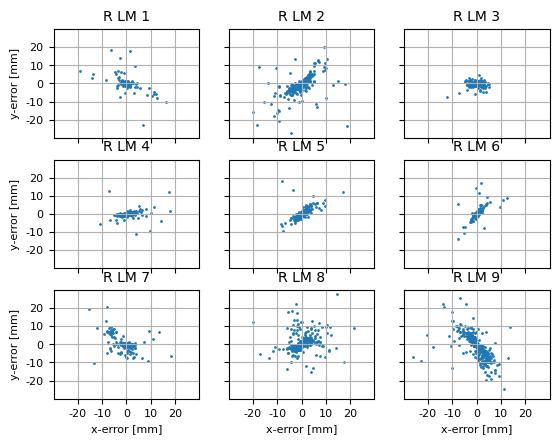

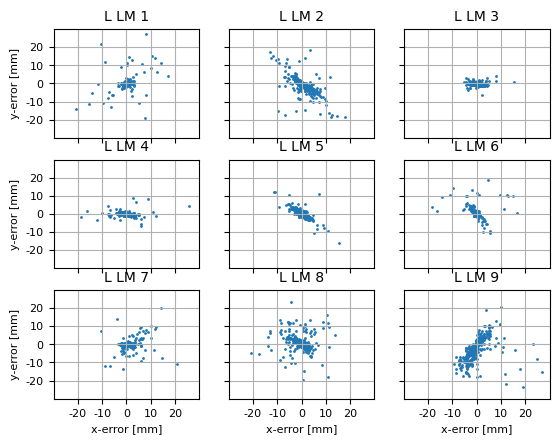

In [1]:
from utils.plotting import lm_dist_plot
lm_dist_plot(stat_file_name = "lm_cl_aug2_dists.csv")

In [1]:
from utils.plotting import lm_dist_calc
lm_dist_calc(csv_name="final_dists.csv",pred_name="Predicted_CL_AUG2 Pred CSVs")

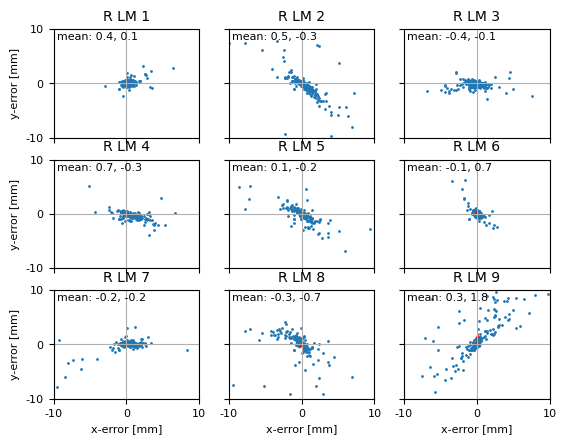

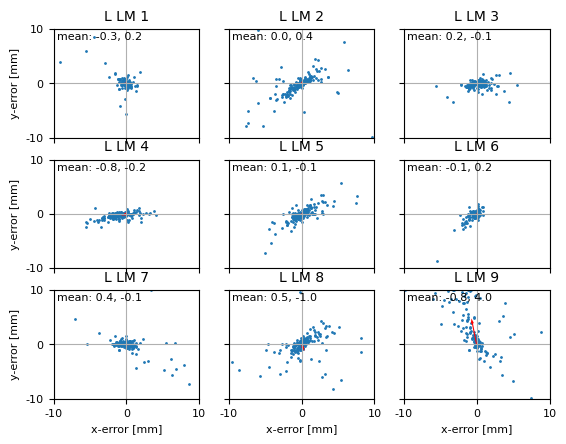

In [1]:
from utils.plotting import lm_dist_plot
lm_dist_plot(stat_file_name = "final_dists.csv")

33938555
5.41204270813486
5.2326966683092735


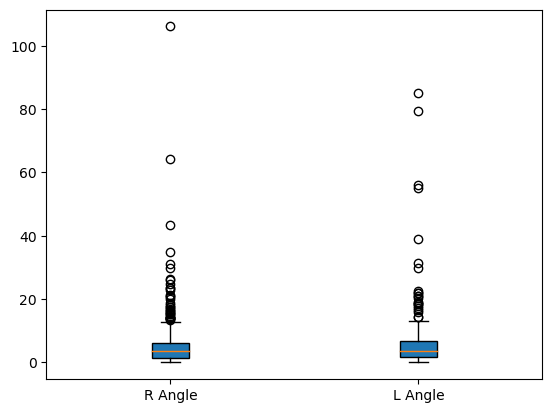

In [20]:
import os
from glob import glob
import pandas as pd
import math
import numpy as np

root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
csv_dir = os.path.join(root,"Dataset","CSVs")

filenames = [os.path.normpath(file).split(os.path.sep)[-1].split('.')[0]
                     for file in glob(os.path.join(csv_dir,"*.csv"))]

df_target = pd.read_csv(os.path.join(root,"Results","Statistics","target_128_metrics.csv"))
df_pred = pd.read_csv(os.path.join(root,"Results","Statistics","cl_128_metrics.csv"))

r_dists = []
l_dists = []
for filename in filenames:
    r_ang_tar = df_target.loc[df_target["Image"]==int(filename),"r_ang_3_4"]
    l_ang_tar = df_target.loc[df_target["Image"]==int(filename),"l_ang_14_15"]
    r_ang_pred = df_pred.loc[df_pred["Image"]==int(filename),"r_ang_3_4"] 
    l_ang_pred = df_pred.loc[df_pred["Image"]==int(filename),"l_ang_14_15"]
    
    if not math.isnan(r_ang_tar) and not math.isnan(r_ang_pred):
        r_dist = abs(r_ang_pred-r_ang_tar) 
        r_dists.append(float(r_dist))
        if float(r_dist) >= 100:
            print(filename)
    if not math.isnan(l_ang_tar) and not math.isnan(l_ang_pred):
        l_dist = abs(l_ang_pred-l_ang_tar) 
        l_dists.append(float(l_dist))
        
    
        
print(np.mean(l_dists))
print(np.mean(r_dists))

box_plot_data=[r_dists,l_dists]
plt.boxplot(box_plot_data,patch_artist=True,labels=['R Angle','L Angle'])
plt.show()